用于画箱形图对比数据

In [2]:
import scipy.stats as stats
import csv
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
font_manager.fontManager.addfont('/SanDisk/Li/font_libin/times.ttf')

In [3]:
#设置绘图格式
config = {
    "font.family": 'serif',
    "font.serif": ['Times New Roman'],
    "font.size": 20,
    "mathtext.fontset": 'stix',
}
plt.rcParams.update(config)

40 40
-0.8860612332803751 0.37830818039967284


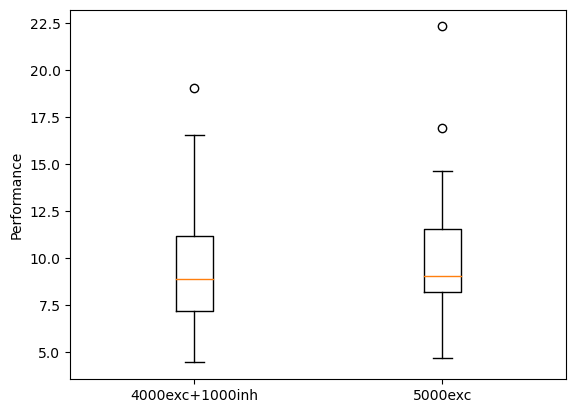

In [12]:
origin = []
origin_onlyexc = []

with open('prop_origin.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin.extend([float(item) for item in row])

with open('prop_origin_onlyexc.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin_onlyexc.extend([float(item) for item in row])

fig, ax = plt.subplots()
ax.boxplot([origin,origin_onlyexc])
# ax.set_title(title[j])
# ax.set_xlabel('Weight')
ax.set_ylabel('Performance')
ax.set_xticklabels(['4000exc+1000inh', '5000exc'])
print(len(origin),len(origin_onlyexc))
t_statistic, p_value = stats.ttest_ind(origin,origin_onlyexc)
print(t_statistic,p_value)

In [ ]:
# 读取csv文件并画图

title = ['E -> E','I -> E','E -> I','I -> I']
data_name = ['prop_change_EE_70','prop_change_EE_130',
        'prop_change_EI_70','prop_change_EI_130',
        'prop_change_IE_70','prop_change_IE_130',
        'prop_change_II_70','prop_change_II_130']
data = [[],[],
        [],[],
        [],[],
        [],[],]
origin = []

for i in range(len(data_name)):
    with open(f'{data_name[i]}.csv', mode='r') as file:
        # 创建一个CSV阅读器
        reader = csv.reader(file)
        # 遍历CSV文件中的每一行
        for row in reader:
            data[i].extend([float(item) for item in row])
            # print(row)  # 每个`row`是一个列表，包含了CSV行中的数据
with open('prop_origin.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin.extend([float(item) for item in row])

# data = np.array([np.array(item).astype(float) for item in data])
# origin = np.array(origin).astype(float)
j = 0
for i in range(0,8,2):
    fig, ax = plt.subplots()
    ax.boxplot([data[i],origin,data[i+1]])
    ax.set_title(title[j])
    ax.set_xlabel('Weight')
    ax.set_ylabel('Performance')
    ax.set_xticklabels(['-30%', '0', '+30%'])
    j += 1

    # 显示图形
    plt.show()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
[1919.1907, 388.3065, 256.1551, 61.649635, 7.572979, 25.64163, 32.42282, 42.561253, 27.973139, 24.196877, 32.86533, 26.765268, 27.233746, 30.477512, 22.12389, 30.300241, 36.418728, 31.24168, 48.875076, 45.58297, 38.57487, 45.870163, 44.28681, 56.98136, 54.751682, 57.527466, 63.554516, 67.737755, 64.487564, 70.877304, 75.68399, 63.585983, 65.21264, 76.802155, 88.304115, 94.87571, 74.08164, 99.227394, 76.1

Text(0, 0.5, 'Performance $\\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

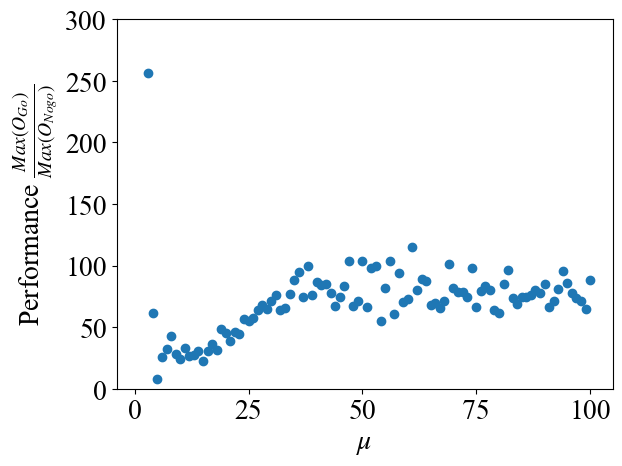

In [68]:
#画performance对mu,RS和sigma的依赖
folder = './change_mu_RS_sigma_N_1000_RS_0.5/'
# mu
with open(folder+'prop_change_mu.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: mu = [float(i) for i in row]
        else: 
            per_mu = [float(i) for i in row]
        count += 1

print(mu)
print(per_mu)

# import mplcyberpunk

# plt.style.use("cyberpunk")

fig, ax = plt.subplots()
ax.scatter(mu,per_mu)
# ax.set_yticks([])
ax.set_ylim(0,300)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

# mplcyberpunk.make_scatter_glow()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[inf, 46.610764, 27.262154, 13.509442, 9.276264, 7.2670817, 7.6066704, 7.58874, 5.083239, 3.990959, 4.648014]


Text(0, 0.5, 'Performance $\\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

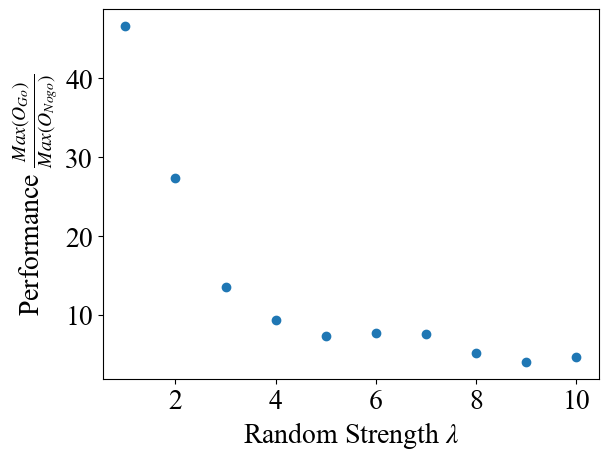

In [64]:
# RS
with open(folder+'prop_change_RS.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: rs = [float(i) for i in row]
        else: 
            per_rs = [float(i) for i in row]
        count += 1

print(rs)
print(per_rs)

fig, ax = plt.subplots()
ax.scatter(rs,per_rs)
# ax.set_ylim(0.5,2)
ax.set_xlabel(r'Random Strength $\lambda$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0]
[71.6008, 67.01321, 83.64825, 77.825645, 90.705086, 70.78959, 87.45348, 79.85799, 84.34949, 97.24551, 58.51186, 70.93624, 63.27147, 95.28295, 74.67458, 80.487915, 98.80033, 58.460835, 48.88608, 72.36015, 95.97119, 80.384895, 45.892998, 86.25765, 106.938286, 92.40158, 77.213905, 83.93399, 49.87502, 73.47775, 101.66082, 85.11712, 73.22767, 84.68042, 37.861443, 68.71679, 82.65218, 65.43632, 87.58997, 67.59565, 93.42274, 56.579502, 107.2578, 109.46817, 75.18299, 80.605125, 70.95813, 75.79323, 92.35879, 109.488556, 63.618633, 95.7761, 58.775566, 75.120094, 64.47286, 103.1288, 68.76965, 

Text(0, 0.5, 'Performance $\\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

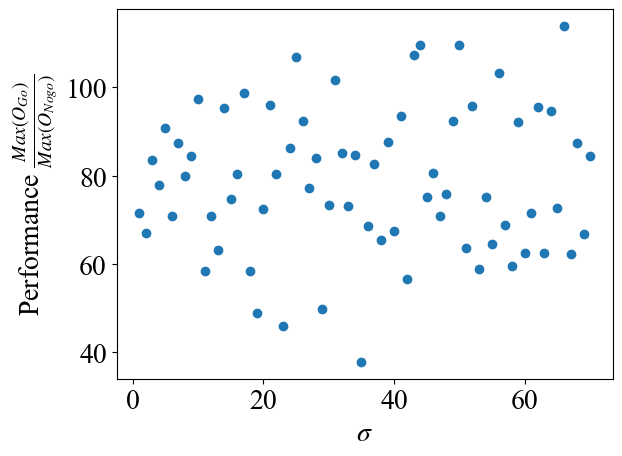

In [65]:
# Sigma
with open(folder+'prop_change_sigma.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: sigma = [float(i) for i in row]
        else: 
            per_sigma = [float(i) for i in row]
        count += 1

print(sigma)
print(per_sigma)

fig, ax = plt.subplots()
ax.scatter(sigma,per_sigma)
# ax.set_ylim(0.5,200000)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')